In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def label_cluster_num(means, mesh_points, metrics):
    def label(point):
        cluster_label = np.argmin(map(lambda mean: metrics(mean, point), means))
        return point, cluster_label
    return map(label, mesh_points)

In [2]:
c_means = np.array([[1, 2], [-3, 4], [-5, -6], [7, -8]])
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(xs, ys)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [3]:
def show_volonoi_with_metrics(metrics):
    labeled_mesh_points = label_cluster_num(c_means, mesh_points, metrics=metrics)
    plt.figure()
    fig, ax = plt.subplots()
    
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    
    for i in range(0, len(c_means)):
        cluster_points = map(lambda (p, label): p, filter(lambda (p, label): label == i, labeled_mesh_points))
        xs = map(lambda p: p[0], cluster_points)
        ys = map(lambda p: p[1], cluster_points)
        ax.scatter(xs, ys, color=cm.prism(i / float(len(c_means))), marker='.')
      
    ax.scatter(map(lambda p: p[0], c_means), map(lambda p: p[1], c_means), color="g", marker='o')
    
    plt.show()

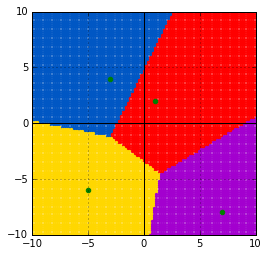

In [4]:
import scipy.spatial.distance as dist

show_volonoi_with_metrics(dist.euclidean)

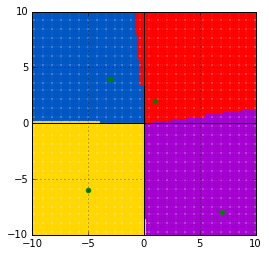

In [5]:
show_volonoi_with_metrics(dist.cosine)

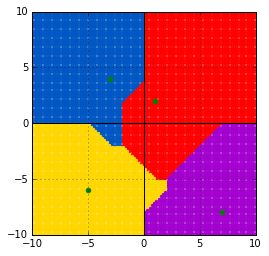

In [6]:
show_volonoi_with_metrics(dist.cityblock)

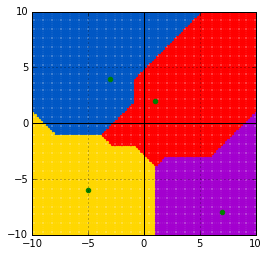

In [7]:
show_volonoi_with_metrics(dist.chebyshev)

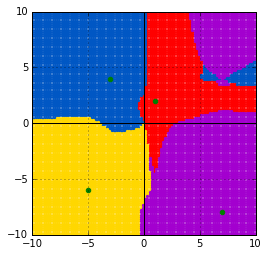

In [8]:
show_volonoi_with_metrics(dist.canberra)